In [1]:
import pandas as pd
import numpy as np
import glob, os

from seahorse import Graph, SContainer
from seahorse import constants, sns
constants.SHOWMODE = True

cpal = ["#90ee90", "#6495ed", "#ca472f", "#f6c85f", "#6f4e7c", "#ffa056", "#558254", "#4ad9e1"]
cdef = "#9dbcd4"

cpalLib = cpal[:3]
cpalQual = [cpal[5], cpal[3], cpal[4]]

import matplotlib as mpl
mpl.rcParams['svg.fonttype'] = 'none' # Output SVG with text as text, not curves
mpl.rcParams['savefig.transparent'] = True # Save w/ transparent background by default

In [2]:
def save_replace_excel(fname, df, sheetname):
    with pd.ExcelWriter(fname, mode='a') as writer:  
        workBook = writer.book
        try:
            workBook.remove(workBook[sheetname])
        except:
            print("worksheet doesn't exist")
        finally:
            df.to_excel(writer, sheet_name=sheetname, index=False)
    
excelpath = '../../../nr-source-data.xlsx'
save_replace_excel_spmp = lambda df, sheetname: save_replace_excel(excelpath, df, sheetname)

In [3]:
fname = '../tables/mags_info_shortread.tsv'
short = pd.read_csv(fname, sep='\t', index_col=0)
short['assembly'] = 'Short-read'

fname = '../tables/mags_info_hybrid.tsv'
hybrid = pd.read_csv(fname, sep='\t', index_col=0)
hybrid['assembly'] = 'Hybrid'

minfo = pd.concat((short, hybrid))
minfo

,name,genus,species,Size,#_contigs,Contig_N50,Longest_contig,Completness,Contamination,CheckMStatus,RNAPass,MIMAG,SLCID,eigen_index,eigen_weight,SLCCat,assembly
0,SPMP01_bin.1,Akkermansia,Akkermansia muciniphila,2233717.0,244.0,11568.0,46799.0,82.67,1.53,MEDIUM,False,MEDIUM,105.0,9.0,0.267135,Isolate,Short-read
1,SPMP01_bin.14,Limosilactobacillus,Limosilactobacillus mucosae,1111771.0,139.0,9477.0,38475.0,63.79,0.00,MEDIUM,False,MEDIUM,17.0,2.0,0.497154,Isolate,Short-read
2,SPMP01_bin.15,CAG-1427,CAG-1427 sp000436075,1339757.0,81.0,21875.0,101229.0,67.74,2.42,MEDIUM,False,MEDIUM,117.0,2.0,0.576977,Uncultivated,Short-read
3,SPMP01_bin.16,RUG013,NaN,1266362.0,214.0,6701.0,40943.0,66.96,2.22,MEDIUM,False,MEDIUM,173.0,0.0,0.707107,Novel,Short-read
4,SPMP01_bin.17,Enterococcus_B,Enterococcus_B faecium,2469094.0,243.0,13399.0,47973.0,91.84,3.45,HIGH,False,MEDIUM,339.0,0.0,NaN,Isolate,Short-read
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4492,SPMP31_bin.71,Methanosphaera,Methanosphaera stadtmanae,1488493.0,19.0,122109.0,266271.0,75.81,0.00,MEDIUM,False,MEDIUM,416.0,3.0,0.446614,Isolate,Hybrid
4493,SPMP39_bin.88,Methanobrevibacter_A,Methanobrevibacter_A smithii_A,1229812.0,78.0,24837.0,64848.0,57.58,0.00,MEDIUM,False,MEDIUM,84.0,1.0,0.707107,Isolate,Hybrid
4494,SPMP48_bin.130,Methanobrevibacter_A,Methanobrevibacter_A smithii_A,1901350.0,3.0,1639946.0,1639946.0,97.14,0.80,HIGH,False,MEDIUM,84.0,0.0,0.707107,Isolate,Hybrid
4495,SPMP51_bin.133,Methanobrevibacter_A,Methanobrevibacter_A smithii,1750191.0,4.0,942232.0,942232.0,97.60,0.00,HIGH,False,MEDIUM,159.0,1.0,0.289670,Isolate,Hybrid


In [4]:
minfo['sample'] = minfo['name'].apply(lambda name: name.split('_')[0])
minfo['sample'] = pd.Categorical(minfo['sample'], sorted(minfo['sample'].unique(), key=lambda x: (len(x), x)))
minfo['assembly'] = pd.Categorical(minfo["assembly"], categories=["Short-read", "Hybrid"])
minfo.head()

,name,genus,species,Size,#_contigs,Contig_N50,Longest_contig,Completness,Contamination,CheckMStatus,RNAPass,MIMAG,SLCID,eigen_index,eigen_weight,SLCCat,assembly,sample
0,SPMP01_bin.1,Akkermansia,Akkermansia muciniphila,2233717.0,244.0,11568.0,46799.0,82.67,1.53,MEDIUM,False,MEDIUM,105.0,9.0,0.267135,Isolate,Short-read,SPMP01
1,SPMP01_bin.14,Limosilactobacillus,Limosilactobacillus mucosae,1111771.0,139.0,9477.0,38475.0,63.79,0.00,MEDIUM,False,MEDIUM,17.0,2.0,0.497154,Isolate,Short-read,SPMP01
2,SPMP01_bin.15,CAG-1427,CAG-1427 sp000436075,1339757.0,81.0,21875.0,101229.0,67.74,2.42,MEDIUM,False,MEDIUM,117.0,2.0,0.576977,Uncultivated,Short-read,SPMP01
3,SPMP01_bin.16,RUG013,NaN,1266362.0,214.0,6701.0,40943.0,66.96,2.22,MEDIUM,False,MEDIUM,173.0,0.0,0.707107,Novel,Short-read,SPMP01
4,SPMP01_bin.17,Enterococcus_B,Enterococcus_B faecium,2469094.0,243.0,13399.0,47973.0,91.84,3.45,HIGH,False,MEDIUM,339.0,0.0,NaN,Isolate,Short-read,SPMP01


## Figure 1.A

In [5]:
count = minfo.groupby("assembly")["sample"].value_counts().rename("count").reset_index()
count.head()

,assembly,sample,count
0,Short-read,SPMP88,49
1,Short-read,SPMP30,47
2,Short-read,SPMP102,47
3,Short-read,SPMP45,43
4,Short-read,SPMP48,41


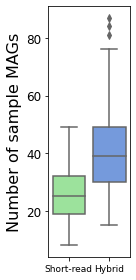

In [6]:
graph = Graph(count)
graph.sns.boxplot(x="assembly", y="count", palette=cpal)

graph.ax.set_xlabel("")
graph.ax.set_ylabel("Number of sample MAGs", size=16)

graph.apply_xticklabels(size=9, rotation=0)
graph.ax.set_yticks((20, 40, 60, 80))
graph.ax.set_yticklabels((20, 40, 60, 80), size=12)

graph.set_size_inches(2, 4)
graph.tight_layout()
graph.save('../img/f1a.svg')

In [7]:
save_replace_excel_spmp(count, 'Fig 1.A')

## Figure 1.D

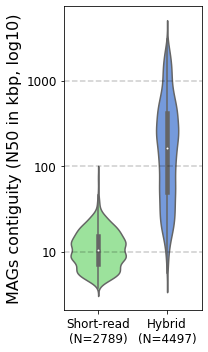

In [8]:
minfo['N50LogKb'] = np.log10(minfo["Contig_N50"] / 1000)

graph = Graph(minfo)
graph.sns.violinplot(x="assembly", y="N50LogKb", palette=cpal)

for i in range(1,4) : 
    graph.ax.axhline(i, color="black", linestyle="--", alpha=.2)

graph.ax.set_yticks([1, 2, 3])
graph.ax.set_yticklabels((10, 100, 1000))
    
graph.ax.set_xlabel("")
graph.ax.set_ylabel("MAGs contiguity (N50 in kbp, log10)", size=16)

graph.add_xticks_ncount("assembly")
graph.apply_xticklabels(size=12)
graph.apply_yticklabels(size=12)

graph.set_size_inches(3, 5)
graph.tight_layout()
graph.save('../img/f1d.svg')

In [9]:
subminfo = minfo[['name', 'assembly', 'Contig_N50', 'N50LogKb']]
save_replace_excel_spmp(subminfo, 'Fig 1.D')

## Figure 1.E

In [10]:
def set_acat(row):
    if 'HIGH' in row['MIMAG']:
        return 'HIGH'
    elif 'HIGH' in row['CheckMStatus']:
        return 'NC' #Near complete
    elif 'MEDIUM' in row['CheckMStatus']:
        return 'MEDIUM'
    else:
        raise Exception(row)

minfo['MIMAGExtended'] = minfo.apply(set_acat, axis=1)
minfo.drop_duplicates('MIMAGExtended')

,name,genus,species,Size,#_contigs,Contig_N50,Longest_contig,Completness,Contamination,CheckMStatus,RNAPass,MIMAG,SLCID,eigen_index,eigen_weight,SLCCat,assembly,sample,N50LogKb,MIMAGExtended
0,SPMP01_bin.1,Akkermansia,Akkermansia muciniphila,2233717.0,244.0,11568.0,46799.0,82.67,1.53,MEDIUM,False,MEDIUM,105.0,9.0,0.267135,Isolate,Short-read,SPMP01,1.063258,MEDIUM
4,SPMP01_bin.17,Enterococcus_B,Enterococcus_B faecium,2469094.0,243.0,13399.0,47973.0,91.84,3.45,HIGH,False,MEDIUM,339.0,0.0,NaN,Isolate,Short-read,SPMP01,1.127072,NC
1,SPMP01_bin.13,Enterococcus_A,Enterococcus_A avium,4163966.0,32.0,571188.0,621046.0,98.00,4.24,HIGH,True,HIGH,420.0,0.0,0.707107,Isolate,Hybrid,SPMP01,2.756779,HIGH


In [11]:
count = minfo.groupby('assembly')['MIMAGExtended'].value_counts().rename('count').reset_index()
count['frac'] = count['count'] / count.groupby('assembly')['count'].transform(sum)
count

,assembly,MIMAGExtended,count,frac
0,Short-read,MEDIUM,1979,0.709573
1,Short-read,NC,810,0.290427
2,Hybrid,MEDIUM,2728,0.606627
3,Hybrid,HIGH,1153,0.256393
4,Hybrid,NC,616,0.136980


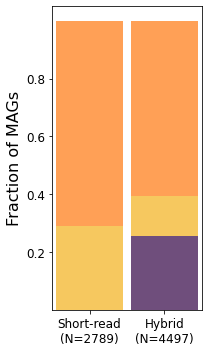

In [12]:
graph = Graph(count)

graph.shs.stacked_barplot(x="assembly", y="frac", hue="MIMAGExtended", 
                          stack_order=['HIGH', 'NC', 'MEDIUM'],
                          palette=cpalQual[::-1])

graph.change_bars_width(.9)

graph.ax.set_xlabel("")
graph.ax.set_ylabel("Fraction of MAGs", size=16)

graph.ax.set_yticks((.2, .4, .6, .8))
graph.ax.set_yticklabels((.2, .4, .6, .8), size=12)

graph.apply_xticklabels(size=12, rotation=0)
graph.add_xticks_ncount('assembly', df=minfo)
graph.remove_legend()

graph.set_size_inches(3, 5)
graph.tight_layout()
graph.save('../img/f1e.svg')

In [13]:
save_replace_excel_spmp(count, 'Fig 1.E')

## Supplemental figures 6

In [14]:
fname = '../tables/mags_info_hic.tsv'
hic = pd.read_csv(fname, sep='\t', index_col=0)

hic['assembly'] = 'Hi-C'
hic = hic[['MAG_ID', 'Contig_N50', 'assembly', 'MIMAGExtended', 'Sample']]

hic.head()

,MAG_ID,Contig_N50,assembly,MIMAGExtended,Sample
0,bin_39,312737,Hi-C,HIGH,SPMP64
1,bin_37,2167246,Hi-C,HIGH,SPMP64
2,bin_24,207223,Hi-C,HIGH,SPMP64
3,bin_36,496855,Hi-C,HIGH,SPMP64
4,bin_23,391310,Hi-C,HIGH,SPMP64


In [15]:
hicsamples = set(hic['Sample'])

minfo_short = minfo[minfo['sample'].isin(hicsamples)]
minfo_short = minfo_short[['name', 'Contig_N50', 'assembly', 'MIMAGExtended', 'sample']]
minfo_short.columns = ['MAG_ID', 'Contig_N50', 'assembly', 'MIMAGExtended', 'Sample']

minfo_short = pd.concat([minfo_short, hic])
minfo_short['assembly'] = pd.Categorical(minfo_short['assembly'], categories=['Short-read', 'Hybrid', 'Hi-C'])

minfo_short

,MAG_ID,Contig_N50,assembly,MIMAGExtended,Sample
0,SPMP01_bin.1,11568.0,Short-read,MEDIUM,SPMP01
1,SPMP01_bin.14,9477.0,Short-read,MEDIUM,SPMP01
2,SPMP01_bin.15,21875.0,Short-read,MEDIUM,SPMP01
3,SPMP01_bin.16,6701.0,Short-read,MEDIUM,SPMP01
4,SPMP01_bin.17,13399.0,Short-read,NC,SPMP01
...,...,...,...,...,...
1676,bin_23,2219261.0,Hi-C,HIGH,SPMP42
1677,bin_13,24205.0,Hi-C,MEDIUM,SPMP42
1678,bin_1,29527.0,Hi-C,MEDIUM,SPMP42
1679,bin_25,18716.0,Hi-C,MEDIUM,SPMP42


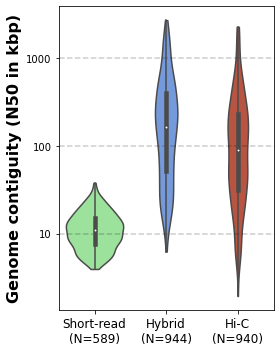

In [16]:
from matplotlib import ticker as mticker
minfo_short["N50KbLog"] = np.log10(minfo_short["Contig_N50"] / 1e3)

graph = Graph(minfo_short)

for i in range(1,4) : 
    graph.ax.axhline(i, color="black", linestyle="--", alpha=.2)

graph.sns.violinplot(x="assembly", y="N50KbLog", cut=0, palette=cpal)

graph.ax.set_yticks([1,2,3])
graph.ax.set_yticklabels((10, 100, 1000))

graph.ax.set_xlabel("")
graph.ax.set_ylabel("Genome contiguity (N50 in kbp)", size=16, weight='bold')

graph.apply_xticklabels(size=12)
graph.add_xticks_ncount("assembly")

graph.set_size_inches(4, 5)
graph.tight_layout()
graph.save('../img/sf6a.svg')

In [17]:
save_replace_excel_spmp(minfo_short, 'SFig 6.A')

In [18]:
count = minfo_short.groupby('assembly')['MIMAGExtended'].value_counts().rename('count').reset_index()
count['frac'] = count['count'] / count.groupby('assembly')['count'].transform(sum)
count

,assembly,MIMAGExtended,count,frac
0,Short-read,MEDIUM,434,0.736842
1,Short-read,NC,155,0.263158
2,Hybrid,MEDIUM,585,0.619703
3,Hybrid,HIGH,234,0.247881
4,Hybrid,NC,125,0.132415
5,Hi-C,MEDIUM,408,0.434043
6,Hi-C,HIGH,287,0.305319
7,Hi-C,NC,245,0.260638


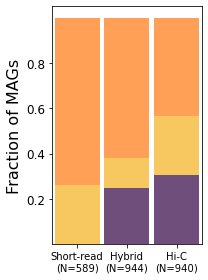

In [19]:
graph = Graph(count)

graph.shs.stacked_barplot(x="assembly", y="frac", hue="MIMAGExtended", 
                          stack_order=['HIGH', 'NC', 'MEDIUM'],
                          palette=cpalQual[::-1])

graph.change_bars_width(.9)

graph.ax.set_xlabel("")
graph.ax.set_ylabel("Fraction of MAGs", size=16)

graph.ax.set_yticks((.2, .4, .6, .8))
graph.ax.set_yticklabels((.2, .4, .6, .8), size=12)

graph.apply_xticklabels(size=10, rotation=0)
graph.add_xticks_ncount('assembly', df=minfo_short)
graph.remove_legend()

graph.set_size_inches(3, 4)
graph.tight_layout()
graph.save('../img/sf6b.svg')

In [20]:
save_replace_excel_spmp(count, 'SFig 6.B')
count.head()

,assembly,MIMAGExtended,count,frac
0,Short-read,MEDIUM,434,0.736842
1,Short-read,NC,155,0.263158
2,Hybrid,MEDIUM,585,0.619703
3,Hybrid,HIGH,234,0.247881
4,Hybrid,NC,125,0.132415


### Supplemental Figure 5.A

In [21]:
fname = '../tables/gunc.tsv.gz'
gunc = pd.read_csv(fname, sep='\t', compression='gzip', index_col=0)
gunc.head()

,genome,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,lib
0,TLL01_bin.12,1756,1724,185,genus,0.97,0.95,0.3,0.03,0.05,0.96,0.91,True,Hybrid
1,TLL01_bin.13,4198,4074,32,kingdom,1.00,0.97,0.0,0.00,0.00,0.96,0.93,True,Hybrid
2,TLL01_bin.16,1625,1563,43,phylum,0.99,0.96,0.1,0.08,0.17,0.71,0.68,True,Hybrid
3,TLL01_bin.17,1753,1700,144,kingdom,1.00,0.97,0.0,0.00,0.00,0.97,0.94,True,Hybrid
4,TLL01_bin.20,2107,2005,27,kingdom,1.00,0.95,0.0,0.00,0.00,0.95,0.90,True,Hybrid


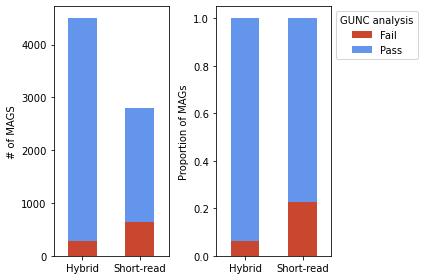

In [22]:
count = gunc.groupby(['lib', 'pass.GUNC']).size().rename('count').reset_index()
count['pass.GUNC'] = count['pass.GUNC'].map({True: 'Pass', False: 'Fail'})

gpal = [cpal[2], cpal[1]]

sc = SContainer(count, 1, 2)

graph = sc.graph(0)
graph.shs.stacked_barplot(x='lib', y='count', hue='pass.GUNC', palette=gpal, legend=False)
graph.ax.set_xlabel('')
graph.ax.set_ylabel('# of MAGS')
graph.apply_xticklabels(rotation=0)

graph = sc.graph(1)
graph.shs.stacked_barplot(x='lib', y='count', hue='pass.GUNC', prop=True, palette=gpal)
graph.ax.set_xlabel('')
graph.apply_xticklabels(rotation=0)
graph.ax.set_ylabel('Proportion of MAGs')
graph.legend_outside(title='GUNC analysis')

sc.set_size_inches(6, 4)
sc.tight_layout()
sc.save('../img/sf5a.svg')

In [23]:
save_replace_excel_spmp(gunc, 'SFig 5.A')
gunc.head()

,genome,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,lib
0,TLL01_bin.12,1756,1724,185,genus,0.97,0.95,0.3,0.03,0.05,0.96,0.91,True,Hybrid
1,TLL01_bin.13,4198,4074,32,kingdom,1.00,0.97,0.0,0.00,0.00,0.96,0.93,True,Hybrid
2,TLL01_bin.16,1625,1563,43,phylum,0.99,0.96,0.1,0.08,0.17,0.71,0.68,True,Hybrid
3,TLL01_bin.17,1753,1700,144,kingdom,1.00,0.97,0.0,0.00,0.00,0.97,0.94,True,Hybrid
4,TLL01_bin.20,2107,2005,27,kingdom,1.00,0.95,0.0,0.00,0.00,0.95,0.90,True,Hybrid


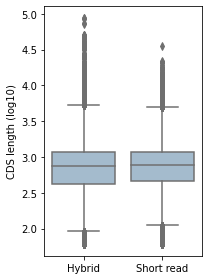

In [24]:
# big dataframe

fname = '../tables/gunc_protsize.parquet.indexed.gz'
psize = pd.read_parquet(fname).reset_index()

psize['library'] = pd.Categorical(psize['library'], categories=['Hybrid', 'Short read'])
psize['cdslen'] = np.log10(psize['recordLen'] * 3)

graph = Graph(psize)
graph.sns.boxplot(x='library', y='cdslen', color=cdef)
graph.ax.set_xlabel('')
graph.ax.set_ylabel('CDS length (log10)', size=10)

graph.set_size_inches(3, 4)
graph.tight_layout()
sc.save('../img/sf5b.svg')

I will not directly save the dataframe as in because of the size

In [25]:
psize['dummy'] = 1
count = psize.pivot_table(index='recordLen', columns='library', values='dummy', aggfunc='sum')

save_replace_excel_spmp(count, 'SFig 5.B')
count.head()

library,Hybrid,Short read
recordLen,,
20,880,2136
21,820,2047
22,1231,3177
23,1305,3264
24,1275,3225


## Figure 2.B

In [26]:
hybrid = minfo[minfo['assembly'] == 'Hybrid'].drop_duplicates('SLCID')
hybrid_count = hybrid['SLCCat'].value_counts().rename('count').reset_index()
hybrid_count['index'] = pd.Categorical(hybrid_count['index'], categories=['Isolate', 'Uncultivated', 'Novel'])
hybrid_count = hybrid_count.sort_values('index')
hybrid_count

,index,count
1,Isolate,252
0,Uncultivated,363
2,Novel,70


In [27]:
hybrid.head()

,name,genus,species,Size,#_contigs,Contig_N50,Longest_contig,Completness,Contamination,CheckMStatus,RNAPass,MIMAG,SLCID,eigen_index,eigen_weight,SLCCat,assembly,sample,N50LogKb,MIMAGExtended
0,SPMP01_bin.12,Mitsuokella,Mitsuokella multacida,1850613.0,185.0,12261.0,43691.0,86.99,0.89,MEDIUM,False,MEDIUM,47.0,6.0,0.243443,Isolate,Hybrid,SPMP01,1.088526,MEDIUM
1,SPMP01_bin.13,Enterococcus_A,Enterococcus_A avium,4163966.0,32.0,571188.0,621046.0,98.00,4.24,HIGH,True,HIGH,420.0,0.0,0.707107,Isolate,Hybrid,SPMP01,2.756779,HIGH
2,SPMP01_bin.16,Olsenella_E,Olsenella_E sp003609875,1811486.0,43.0,56433.0,145834.0,92.13,0.81,HIGH,False,MEDIUM,111.0,3.0,0.258608,Uncultivated,Hybrid,SPMP01,1.751533,NC
3,SPMP01_bin.17,Megasphaera,Megasphaera sp000417505,1824876.0,144.0,17610.0,60409.0,78.97,0.00,MEDIUM,False,MEDIUM,220.0,28.0,0.147752,Isolate,Hybrid,SPMP01,1.245759,MEDIUM
4,SPMP01_bin.20,Akkermansia,Akkermansia muciniphila,2459866.0,27.0,148543.0,389550.0,86.13,0.85,MEDIUM,True,MEDIUM,260.0,10.0,0.258005,Isolate,Hybrid,SPMP01,2.171852,MEDIUM


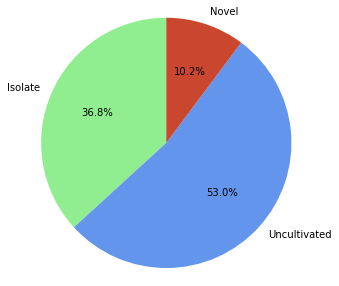

In [28]:
graph = Graph(hybrid_count)
graph.shs.pie("count", labels="index", colors=cpal)
graph.set_size_inches(5, 5)
graph.save('../img/f2b.svg')

In [29]:
save_replace_excel_spmp(hybrid_count, 'Fig 2.B')
hybrid_count.head()

,index,count
1,Isolate,252
0,Uncultivated,363
2,Novel,70


## Supplementary figure 10

The sankey plot has been produced with the website [sankeymatic](http://sankeymatic.com/build/), here I just reproduce how I did the input file.

The order provided bellow is used to fit SF 10.B

In [30]:
order = [
    'Methanobacteriales',
    'Lactobacillales',
    'Erysipelotrichales',
    'RFN20',
    'RF39',
    'Haloplasmatales',
    'Fusobacteriales',
    'Oscillospirales',
    'Monoglobales_A',
    'Monoglobales',
    'TANB77',
    'Lachnospirales',
    'Peptostreptococcales',
    'Eubacteriales',
    'Clostridiales',
    'Christensenellales',
    'Veillonellales',
    'Acidaminococcales',
    'Selenomonadales',
    'Peptococcales',
    'Actinomycetales',
    'Coriobacteriales',
    'Enterobacterales',
    'Burkholderiales',
    'RF32',
    'Desulfovibrionales',
    'Bacteroidales',
    'Flavobacteriales',
    'Verrucomicrobiales',
    'Elusimicrobiales',
    'Brachyspirales',
    'Synergistales',
]

In [31]:
fname = '../tables/gtdb_hybrid.tsv.gz'
df = pd.read_csv(fname, sep='\t', compression='gzip', index_col=0)
df.head()

,name,division,phylum,class,order,family,genus,species
0,SPMP01_bin.12,Bacteria,Firmicutes_C,Negativicutes,Selenomonadales,Selenomonadaceae,Mitsuokella,Mitsuokella multacida
1,SPMP01_bin.13,Bacteria,Firmicutes,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus_A,Enterococcus_A avium
2,SPMP01_bin.16,Bacteria,Actinobacteriota,Coriobacteriia,Coriobacteriales,Atopobiaceae,Olsenella_E,Olsenella_E sp003609875
3,SPMP01_bin.17,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Megasphaera,Megasphaera sp000417505
4,SPMP01_bin.20,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,Akkermansia muciniphila


In [32]:
df['order'] = pd.Categorical(df['order'], categories=order)
df = df.sort_values('order')

corder = df['class'].unique()
df['class'] = pd.Categorical(df['class'], categories=corder)

colnames = ["division", "phylum", "class", "order"]
for idx in range(len(colnames) - 1) :
    pair = colnames[idx:idx+2]
    sdf = df.groupby(pair).size().rename("count").reset_index()
    left, right = pair
    for _, row in sdf.iterrows() :
        if row["count"] == 0: continue
        print ("%s [%i] %s" %(row[left], row["count"], row[right]))

Archaea [19] Methanobacteriota
Bacteria [530] Actinobacteriota
Bacteria [497] Bacteroidota
Bacteria [52] Desulfobacterota
Bacteria [1] Elusimicrobiota
Bacteria [262] Firmicutes
Bacteria [2746] Firmicutes_A
Bacteria [3] Firmicutes_B
Bacteria [259] Firmicutes_C
Bacteria [3] Fusobacteriota
Bacteria [98] Proteobacteria
Bacteria [1] Spirochaetota
Bacteria [3] Synergistota
Bacteria [23] Verrucomicrobiota
Actinobacteriota [234] Actinomycetia
Actinobacteriota [296] Coriobacteriia
Bacteroidota [497] Bacteroidia
Desulfobacterota [52] Desulfovibrionia
Elusimicrobiota [1] Elusimicrobia
Firmicutes [262] Bacilli
Firmicutes_A [2685] Clostridia
Firmicutes_A [61] Clostridia_A
Firmicutes_B [3] Peptococcia
Firmicutes_C [259] Negativicutes
Fusobacteriota [3] Fusobacteriia
Methanobacteriota [19] Methanobacteria
Proteobacteria [95] Gammaproteobacteria
Proteobacteria [3] Alphaproteobacteria
Spirochaetota [1] Brachyspirae
Synergistota [3] Synergistia
Verrucomicrobiota [23] Verrucomicrobiae
Methanobacteria [19

In [33]:
save_replace_excel_spmp(df, 'SFig 10.A')
df.head()

,name,division,phylum,class,order,family,genus,species
4496,SPMP88_bin.19,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii
4495,SPMP51_bin.133,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii
4478,SPMP03_bin.52,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii
4479,SPMP04_bin.116,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii
4480,SPMP05_bin.17,Archaea,Methanobacteriota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter_A,Methanobrevibacter_A smithii


For Supplementary Figure 10.B, the tree has been produced independantly and added later

In [34]:
fname = '../tables/mags_info_hybrid.tsv'
minfo = pd.read_csv(fname, sep='\t', index_col=0)

minfo = minfo.merge(df, on='name', how='left')
minfo['order'] = pd.Categorical(minfo['order'], categories=order)
minfo['SLCCat'] = pd.Categorical(minfo['SLCCat'], categories=['Isolate', 'Uncultivated', 'Novel'])

minfo.head()

,name,genus_x,species_x,Size,#_contigs,Contig_N50,Longest_contig,Completness,Contamination,CheckMStatus,...,eigen_index,eigen_weight,SLCCat,division,phylum,class,order,family,genus_y,species_y
0,SPMP01_bin.12,Mitsuokella,Mitsuokella multacida,1850613.0,185.0,12261.0,43691.0,86.99,0.89,MEDIUM,...,6,0.243443,Isolate,Bacteria,Firmicutes_C,Negativicutes,Selenomonadales,Selenomonadaceae,Mitsuokella,Mitsuokella multacida
1,SPMP01_bin.13,Enterococcus_A,Enterococcus_A avium,4163966.0,32.0,571188.0,621046.0,98.00,4.24,HIGH,...,0,0.707107,Isolate,Bacteria,Firmicutes,Bacilli,Lactobacillales,Enterococcaceae,Enterococcus_A,Enterococcus_A avium
2,SPMP01_bin.16,Olsenella_E,Olsenella_E sp003609875,1811486.0,43.0,56433.0,145834.0,92.13,0.81,HIGH,...,3,0.258608,Uncultivated,Bacteria,Actinobacteriota,Coriobacteriia,Coriobacteriales,Atopobiaceae,Olsenella_E,Olsenella_E sp003609875
3,SPMP01_bin.17,Megasphaera,Megasphaera sp000417505,1824876.0,144.0,17610.0,60409.0,78.97,0.00,MEDIUM,...,28,0.147752,Isolate,Bacteria,Firmicutes_C,Negativicutes,Veillonellales,Megasphaeraceae,Megasphaera,Megasphaera sp000417505
4,SPMP01_bin.20,Akkermansia,Akkermansia muciniphila,2459866.0,27.0,148543.0,389550.0,86.13,0.85,MEDIUM,...,10,0.258005,Isolate,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Akkermansiaceae,Akkermansia,Akkermansia muciniphila


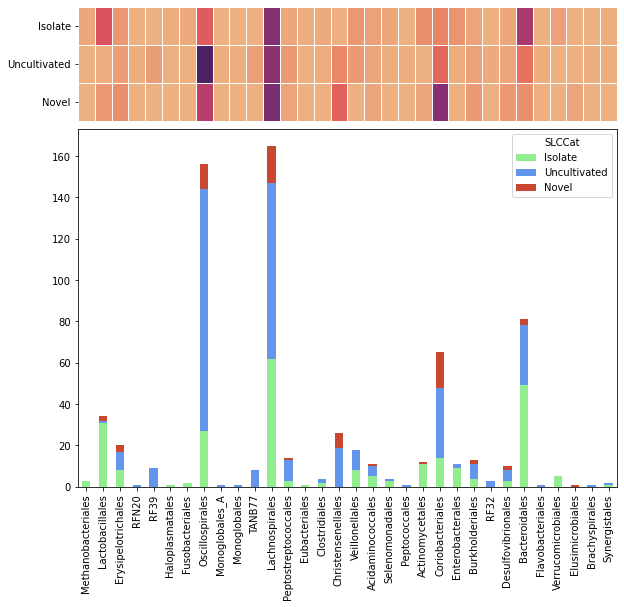

In [35]:
sc = SContainer(None, 4, 1)

sdf = minfo.groupby(['order', 'SLCCat'])['SLCID'].nunique().rename('count').reset_index()
sdf['prop'] = sdf['count'] * 100 / sdf.groupby('SLCCat')['count'].transform(sum)

cmap = sns.color_palette("flare", as_cmap=True)

matrix = sdf.pivot_table(index='SLCCat', columns='order', values='prop')
graph = sc.graph(0, matrix)
graph.sns.heatmap(cmap=cmap, linewidth=1, cbar=False)
graph.remove_xticks()
graph.ax.set_xlabel('')
graph.ax.set_ylabel('')

graph = sc.graph((slice(1, 4), 0), sdf)
graph.shs.stacked_barplot(x='order', y='count', hue='SLCCat', palette=cpal)
graph.ax.set_xlabel('')

sc.tight_layout()
sc.set_size_inches(8, 8)

In [36]:
save_replace_excel_spmp(sdf, 'SFig 10.B')
sdf.head()

,order,SLCCat,count,prop
0,Methanobacteriales,Isolate,3,1.190476
1,Methanobacteriales,Uncultivated,0,0.000000
2,Methanobacteriales,Novel,0,0.000000
3,Lactobacillales,Isolate,31,12.301587
4,Lactobacillales,Uncultivated,1,0.275482


The tree linked to this figure has been built with Affinity designer based on results you can find in `htree.ipynb`